**Importing the Libraries**


In [2]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the Dataset**

In [5]:
red=pd.read_csv('winequality-red.csv')
white=pd.read_csv('winequality-white.csv')

In [20]:
red.columns = red.columns.str.strip()
white.columns = white.columns.str.strip()

**Add Wine Type**

In [6]:
red['wine_type'] = 'red'
white['wine_type'] = 'white'

In [7]:
data = pd.concat([red, white], ignore_index=True)

In [21]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_label'],
      dtype='object')


**Encoding & Feature Scaling**

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
data['wine_type'] = le.fit_transform(data['wine_type'])

In [9]:
def classify_quality(score):
    if score <= 5:
        return 0
    elif score == 6:
        return 1
    else:
        return 2

In [25]:
X = data.drop('quality_label', axis=1)
y = data['quality_label']

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X)

     fixed acidity volatile acidity citric acid residual sugar chlorides  \
0              7.4              0.7           0            1.9     0.076   
1              7.8             0.88           0            2.6     0.098   
2              7.8             0.76        0.04            2.3     0.092   
3             11.2             0.28        0.56            1.9     0.075   
4              7.4              0.7           0            1.9     0.076   
...            ...              ...         ...            ...       ...   
6492           6.2             0.21        0.29            1.6     0.039   
6493           6.6             0.32        0.36              8     0.047   
6494           6.5             0.24        0.19            1.2     0.041   
6495           5.5             0.29         0.3            1.1     0.022   
6496             6             0.21        0.38            0.8      0.02   

     free sulfur dioxide total sulfur dioxide  density    pH sulphates alcohol  
0     

**Training and testing by splitting the Dataset**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-0.47465165 -0.6054167   0.21586609 ... -0.17727182 -1.08383282
   0.00687492]
 [ 0.8367388  -0.36243847  1.11052557 ...  0.25811972  0.5963377
   1.60000607]
 [ 0.37389511  2.27994976 -2.12401256 ...  1.19110159  0.26030359
   1.09691202]
 ...
 [-0.62893288  0.18426254 -0.81643332 ...  0.13372214 -0.6805919
  -0.83161516]
 [-0.55179227 -0.48392759  1.24816549 ... -0.23947061 -0.41176462
  -0.83161516]
 [-0.01180796  1.70287646 -1.77991276 ...  1.81308951  0.05868313
  -0.83161516]]
[[-0.16608919 -1.0306286   2.89984453 ...  0.25811972 -1.016626
   1.43230805]
 [ 0.37389511  1.82436558 -0.74761336 ...  0.32031851 -0.54617826
  -0.49621913]
 [-0.32037042  0.30575165  0.14704613 ... -0.23947061 -0.61338508
   1.26461004]
 ...
 [-0.47465165 -1.09137315  0.21586609 ... -0.17727182  1.47002637
   1.60000607]
 [-0.47465165  0.30575165  0.42232597 ...  0.50691489  0.26030359
  -0.91546416]
 [ 0.14247327 -1.09137315 -0.33469359 ... -1.98103678 -0.6805919
  -1.50240722]]
1916    0
947     2
8

**Applying ML algorithm**

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
import joblib
joblib.dump(model, 'wine_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

**Predict and Evaluate**

In [32]:
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74       451
           1       0.69      0.71      0.70       597
           2       0.75      0.63      0.69       252

    accuracy                           0.71      1300
   macro avg       0.72      0.70      0.71      1300
weighted avg       0.71      0.71      0.71      1300



**Plotting Confuson Matrix**

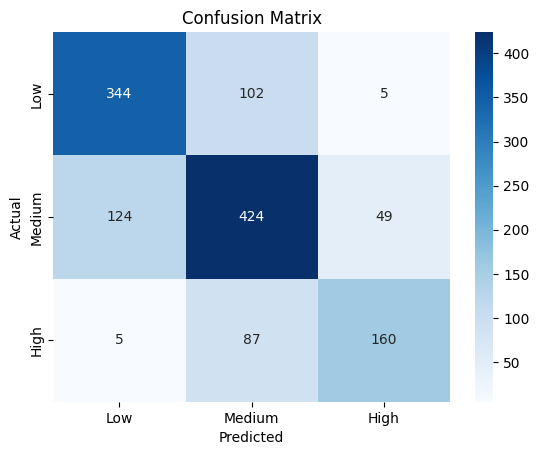

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
